#  ARDL model for Time Series forecasting

This notebook will go over the ARDL model.

ARDL stands for Autoregressive Distributed Lag. The ARDL model is a combination of the Autoregressive (AR) - a linear component with self-lagged values and Distributed Lag (DL) - a weighted sum of lagged versions of some exogenous variable(s).

The ARDL model is pretty flexible and it can handle situations where some variables are I(0) (integrated of order 0, meaning they are stationary) and others are I(1) (integrated of order 1, meaning they have a unit root and are non-stationary). That is, the ARDL model also works for non-stationary variables i.e., variables that have trends and do not have a constant mean and variance over time.

One popular use of ARDL is Time Series forecasting  of variables that are dependent on macro-economic conditions. 

The general formula of an ARDL model of order (p, q) is:
    
y_t = b_0 + b_1 * y_t-1 + ... b_p * y_t-p + c_0 * x + c_1 * x_t-1 + c_q * x_t-q + epsilon


Below is the equation of ARDL(1, 1) model written using sympy library in Python:

In [1]:
import sympy as sp

# Define symbols
y, x = sp.symbols('y x')
y_lag1, x_lag1 = sp.symbols('y_lag1 x_lag1')  # Lagged variables (order 1)

# Define ARDL equation
# For example, an ARDL(1, 1, 1, 1) model can be written as follows:
# ARDL(1, 1, 1, 1) model equation:
# y = beta_0 + beta_1 * y_lag1 + gamma_0 * x + gamma_1 * x_lag1 + epsilon

# Coefficients
beta_0, beta_1, gamma_0, gamma_1 = sp.symbols('beta_0 beta_1 gamma_0 gamma_1')

# Error term
epsilon = sp.symbols('epsilon')

# ARDL equation
ardl_equation = sp.Eq(y, beta_0 + beta_1 * y_lag1 + gamma_0 * x + gamma_1 * x_lag1 + epsilon)

# Display the equation
print(ardl_equation)


Eq(y, beta_0 + beta_1*y_lag1 + epsilon + gamma_0*x + gamma_1*x_lag1)


###  Build an ARDL model

In [2]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.stattools import adfuller, kpss

### Example: 

Analyse the long-run relationship between the variables: GDP and Investment

In [3]:
# generate sample data for GDP and Investment
np.random.seed(42)
num_periods = 100
t = np.arange(num_periods)
gdp = 100 + 0.5 * t + np.random.normal(0, 5, num_periods)
investment = 30 + 0.2 * t + np.random.normal(0, 3, num_periods)

# Create a DataFrame
data = pd.DataFrame({
    'GDP': gdp,
    'Investment': investment
})

data

,GDP,Investment
0,102.483571,25.753888
1,99.808678,28.938064
2,104.238443,29.371856
3,109.115149,28.193168
4,100.829233,30.316143
...,...,...
95,140.182425,50.155952
96,149.480601,46.548428
97,149.805276,49.861175
98,149.025567,49.774626


#### Augmented Ducky Fuller (ADF) Test of Stationarity:

H0: Time series is not stationary

H1: Time series is stationary

In [4]:
# Check if the variables are stationary (I(0)) or non-stationary (I(1))
def check_stationarity(data):
    result = adfuller(data)
    p_value = result[1]
    if p_value <= 0.05:
        return True
    else:
        return False


C:\Users\laptop\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                              ARDL Model Results                              
Dep. Variable:                    GDP   No. Observations:                   99
Model:               ARDL(0, 0, 0, 0)   Log Likelihood                -319.397
Method:               Conditional MLE   S.D. of innovations              6.094
Date:                Wed, 26 Jul 2023   AIC                            646.795
Time:                        00:16:52   BIC                            657.175
Sample:                             0   HQIC                           650.995
                                   99                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
GDP_lag1.L0            0.7409      0.074     10.043      0.000       0.594       0.887
Investment.L0          0.3520      0.193      1.825      0.071      -0.031       0.735
Investment_lag1.L0  

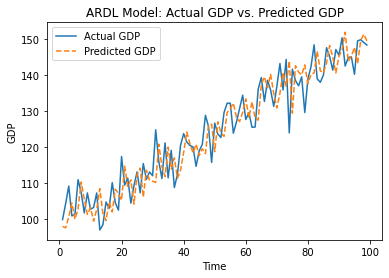

In [5]:

# Create lagged variables
data['GDP_lag1'] = data['GDP'].shift(1)
data['Investment_lag1'] = data['Investment'].shift(1)

# Drop rows with NaN values (due to the creation of lags)
data = data.dropna()

# Define the ARDL(1,1) model formula
formula = 'GDP ~ GDP_lag1 + Investment + Investment_lag1'

# Fit the ARDL model using the formula
model = sm.tsa.ARDL.from_formula(formula, data)

# Estimate the model
results = model.fit()

# Print the model summary
print(results.summary())

# Plot the actual GDP and Investment data along with the predicted GDP
plt.plot(data.index, data['GDP'], label='Actual GDP')
plt.plot(data.index, results.fittedvalues, label='Predicted GDP', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.title('ARDL Model: Actual GDP vs. Predicted GDP')
plt.show()


Remarks:
    
1)In this example, I used GDP lags of order 1 and Investment lags of order 1. 
You can adjust the formula based on your specific ARDL model requirements.

2)Please note that since I used random noise to 
generate the sample dataset, the results will vary each time you run the code. 
In a real-world scenario, you would use your own dataset for GDP and 
investment to estimate the ARDL model.
